In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecomm_data.csv')


In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
df.columns = df.columns.str.strip()

In [10]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [12]:
df.dropna(subset=['Order Date'], inplace=True)


In [14]:
#1. Total Sales / Revenue
total_sales = df['Sales'].sum()
print(f"✅ Total Revenue: ${total_sales:,.2f}")

✅ Total Revenue: $12,642,501.91


In [15]:
# 2. Monthly Sales Trend
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


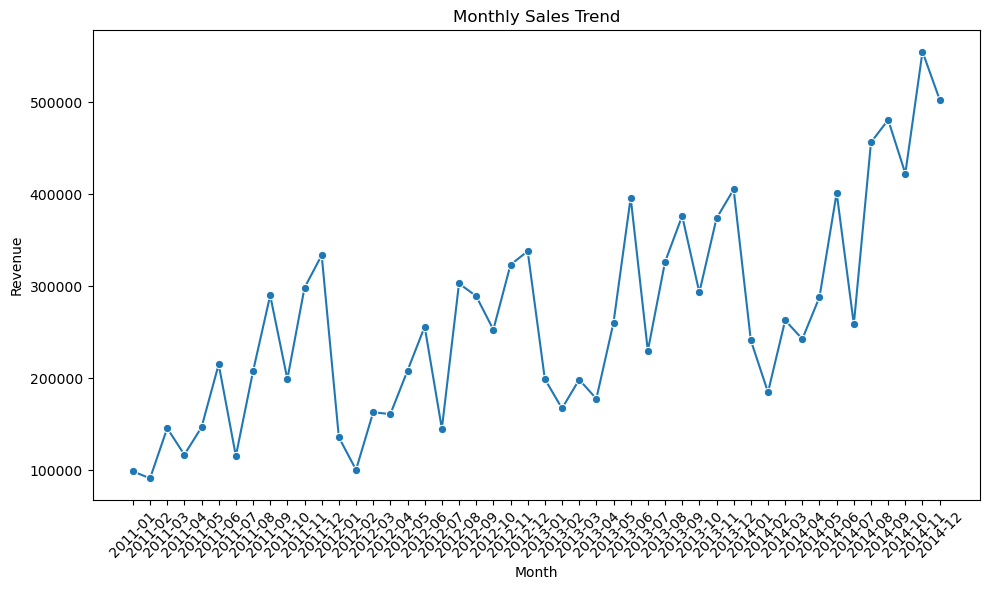

In [18]:
# Convert Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.dropna(subset=['Order Date'], inplace=True)

# Ensure Sales is numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Create Month column as string
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by Month and sum Sales
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Plotting sales trend
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

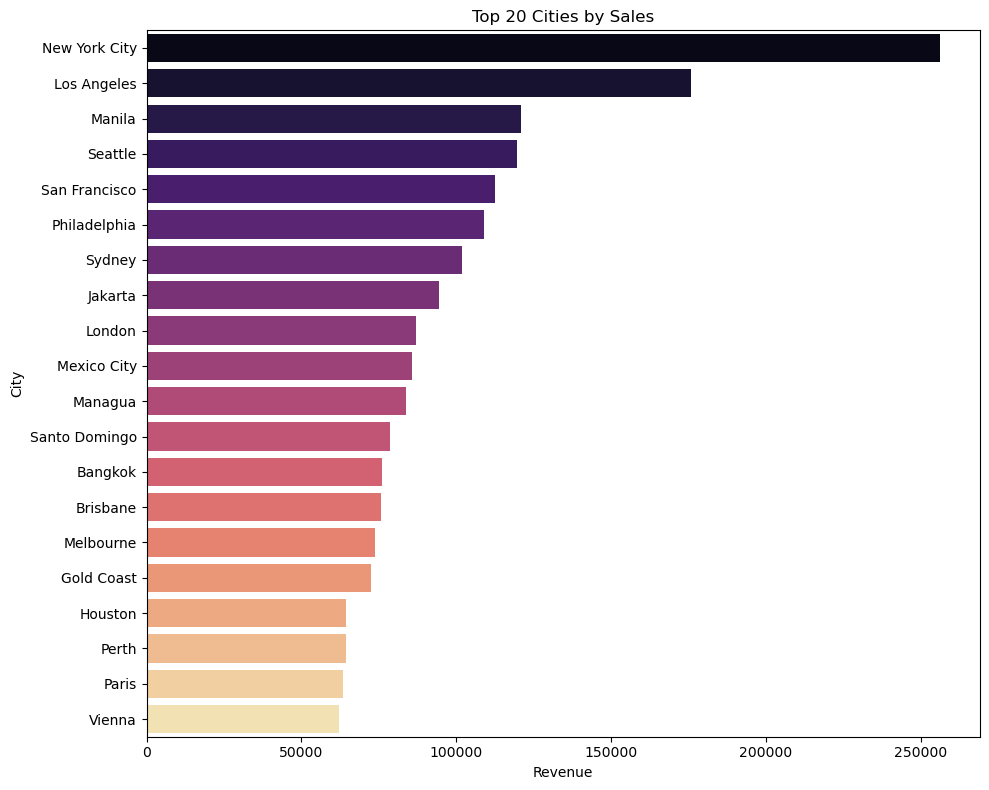

In [20]:
# Top 20 cities again
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20).reset_index()

# Plot horizontally
plt.figure(figsize=(10, 8))
sns.barplot(data=top_cities, y='City', x='Sales', palette='magma')
plt.title('Top 20 Cities by Sales')
plt.xlabel('Revenue')
plt.ylabel('City')
plt.tight_layout()
plt.show()


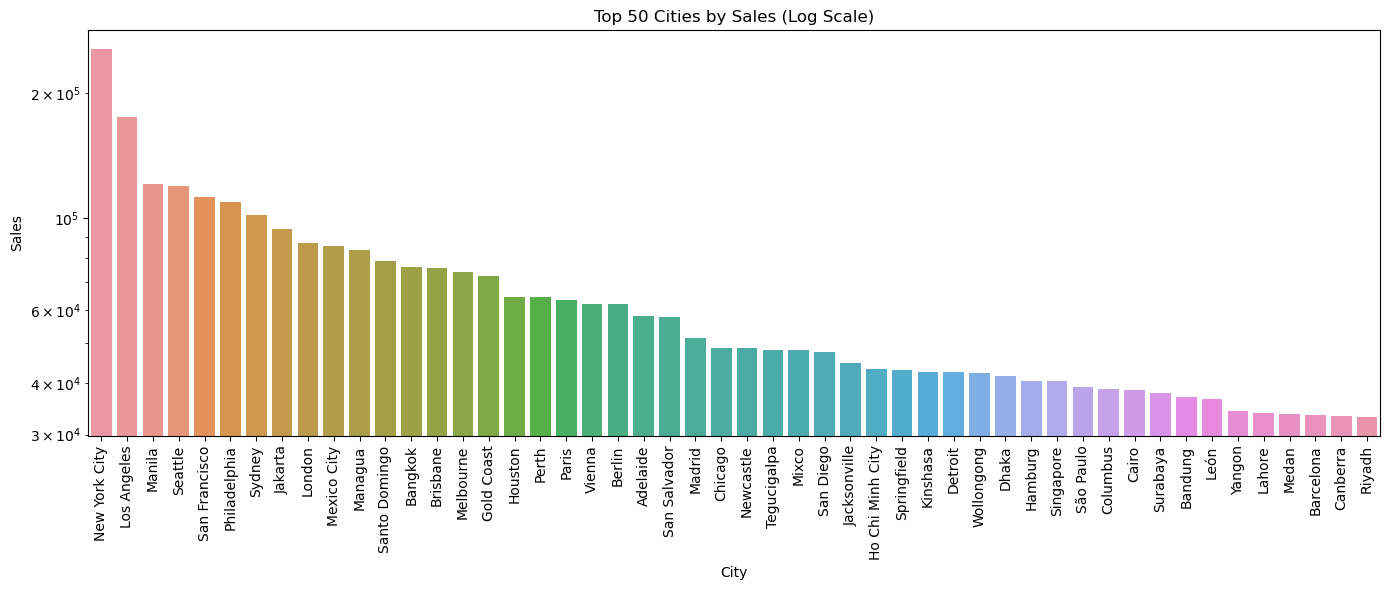

In [21]:
# All cities
city_sales = df.groupby('City')['Sales'].sum().reset_index()

# Plot with log scale
plt.figure(figsize=(14, 6))
sns.barplot(data=city_sales.sort_values('Sales', ascending=False).head(50), x='City', y='Sales')
plt.yscale('log')
plt.title('Top 50 Cities by Sales (Log Scale)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


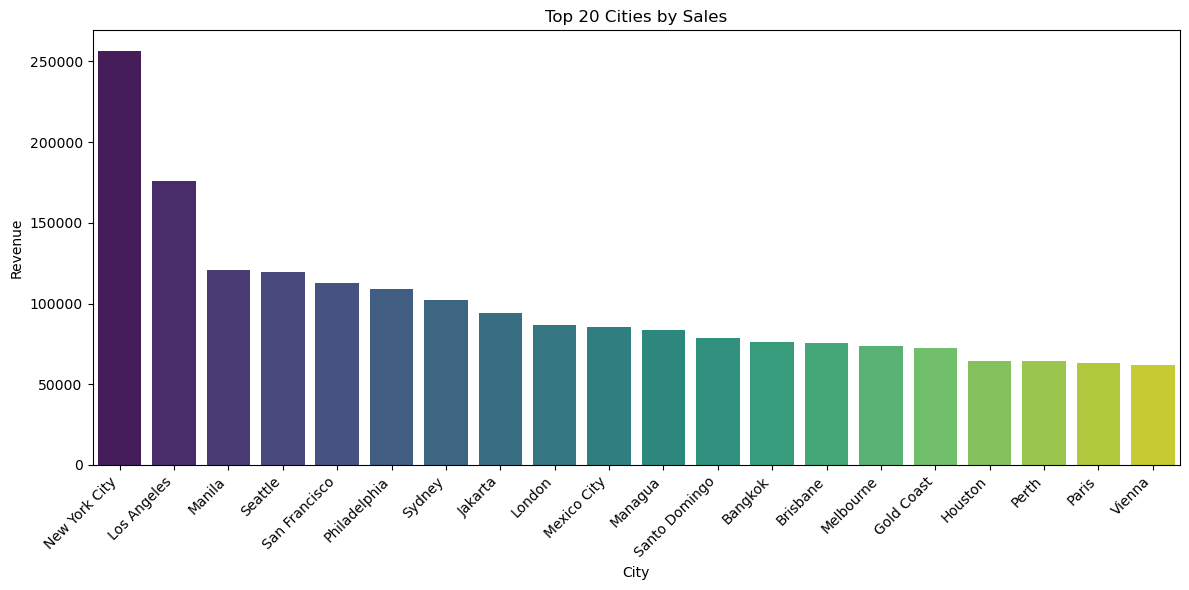

In [22]:
# Group by City and sum Sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Sales', palette='viridis')
plt.title('Top 20 Cities by Sales')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()
